In [1]:
%load_ext autoreload
%autoreload 2

# Analyse the RBS data from Salis 2009

Thank you ScienceMachine :) 

Prompt: Using the Excel sheet named "Salis 2009" in the attached file, make a new sheet with the features "mRNA sequence", "Predicted dG_tot [kcal/mol]", "Average Fluorescence [au]", "Standard Deviation of Fluorescence [au]", "n", "Doubling Time [hours]", "Prediction #", "Log Average Fluorescence [au]", "Spacer Series #"

In [2]:
import os

fn = os.path.join('data', 'RBSCalculatorData.xlsx')
top_dir = os.path.join('data', '19_analyse_RBS_data_Salis')

In [3]:
import pandas as pd

# Read the Excel file
excel_file = pd.ExcelFile(fn)

# Read the Salis 2009 sheet
df = excel_file.parse('Salis 2009')

# Display the column names
print("Column names:")
print(df.columns.tolist())
print("\nShape of dataframe:", df.shape)

Column names:
['Supplementary Table I', 'Automated Design of Synthetic Ribosome Binding Sites to Precisely Control Protein Expression by Howard Salis, Ethan Mirsky, and Christopher Voigt', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']

Shape of dataframe: (155, 9)


In [4]:
# Let's look at the first 20 rows to understand the structure
print("First 20 rows:")
for i in range(20):
    print(f"Row {i}: {df.iloc[i].tolist()}")

First 20 rows:
Row 0: ['Total number of RBSs: 132 (119 predictions)', nan, nan, nan, nan, nan, nan, nan, nan]
Row 1: ['Spacer Series (Figure S2)', 'mRNA sequence (containing the RBS and the beginning of the mRFP1 protein coding sequence, XbaI and SacI sites bolded)', 'Average Fluorescence [au] (n=5)', 'Standard Deviation of Fluorescence [au] (n=5)', 'dG_spacing [kcal/mol]', 'Predicted dG_tot [kcal/mol]', 'Spacer Series #', 'Log Average Fluorescence [au]', nan]
Row 2: ['s = 0', 'TTCTAGAAAAAAAATAAGGAGGTATGGCGAGCTCTGAAGACGTTATCAAAGAGTTCATGCGTTTCAAAGTTCGTATGGAA', 101.28, 54.34, 12.26, 4.104, 1, 4.617888958, nan]
Row 3: ['s = 1', 'TTCTAGAAAAAAAATAAGGAGGTAATGGCGAGCTCTGAAGACGTTATCAAAGAGTTCATGCGTTTCAAAGTTCGTATGGA', 133.59, 118.37, 11.7, 3.881, 2, 4.894775408, nan]
Row 4: ['s = 2', 'TTCTAGAAAAAAAATAAGGAGGTAAATGGCGAGCTCTGAAGACGTTATCAAAGAGTTCATGCGTTTCAAAGTTCGTATGG', 247.7, 119.81, 10.46, 1.554, 3, 5.512218336, nan]
Row 5: ['s = 3', 'TTCTAGAAAAAAAATAAGGAGGTAAAATGGCGAGCTCTGAAGACGTTATCAAAGAGTTCATGCG

In [5]:
# Read the Excel file again
import pandas as pd
import numpy as np

# Read the Salis 2009 sheet
df = pd.read_excel(fn, sheet_name='Salis 2009', header=None)

# Initialize lists to store the data
data_rows = []

# Process the spacer series section (rows 2-14)
for i in range(2, 15):
    row = df.iloc[i]
    if pd.notna(row[1]):  # Check if mRNA sequence exists
        data_rows.append({
            'mRNA sequence': row[1],
            'Predicted dG_tot [kcal/mol]': row[5],
            'Average Fluorescence [au]': row[2],
            'Standard Deviation of Fluorescence [au]': row[3],
            'n': 5,  # n=5 for this section
            'Doubling Time [hours]': np.nan,  # Not available for this section
            'Prediction #': np.nan,  # Not available for this section
            'Log Average Fluorescence [au]': row[7],
            'Spacer Series #': row[6]
        })

print(f"Processed {len(data_rows)} rows from spacer series section")

Processed 13 rows from spacer series section


In [6]:
# Continue processing the reverse engineered RBS series (rows 17-24)
for i in range(17, 25):
    row = df.iloc[i]
    if pd.notna(row[1]) and row[1] != 'mRNA sequence (containing the RBS and the beginning of the mRFP1 protein coding sequence, XbaI and SacI sites bolded)':
        data_rows.append({
            'mRNA sequence': row[1],
            'Predicted dG_tot [kcal/mol]': row[2],
            'Average Fluorescence [au]': row[3],
            'Standard Deviation of Fluorescence [au]': row[4],
            'n': 6,  # n=6 for this section
            'Doubling Time [hours]': row[5],
            'Prediction #': row[7],
            'Log Average Fluorescence [au]': row[8],
            'Spacer Series #': np.nan  # Not available for this section
        })

print(f"Total rows after reverse engineered section: {len(data_rows)}")

Total rows after reverse engineered section: 20


In [7]:
# Continue processing the rest of the data
# Find where the next sections start
for i in range(25, len(df)):
    row = df.iloc[i]
    if pd.notna(row[1]) and isinstance(row[1], str) and len(row[1]) > 50:  # Likely an mRNA sequence
        # Check which format this row follows
        if pd.notna(row[2]) and pd.notna(row[3]) and pd.notna(row[4]):
            # This appears to be the format with Predicted dG_tot in column 2
            data_rows.append({
                'mRNA sequence': row[1],
                'Predicted dG_tot [kcal/mol]': row[2],
                'Average Fluorescence [au]': row[3],
                'Standard Deviation of Fluorescence [au]': row[4],
                'n': 6 if pd.notna(row[5]) else np.nan,
                'Doubling Time [hours]': row[5] if pd.notna(row[5]) else np.nan,
                'Prediction #': row[7] if pd.notna(row[7]) else np.nan,
                'Log Average Fluorescence [au]': row[8] if pd.notna(row[8]) else np.nan,
                'Spacer Series #': np.nan
            })

print(f"Total rows processed: {len(data_rows)}")

Total rows processed: 136


In [8]:
# Remove the header row that was accidentally included
data_rows = [row for row in data_rows if not row['mRNA sequence'].startswith('mRNA sequence')]

# Create a DataFrame from the collected data
result_df = pd.DataFrame(data_rows)

# Reorder columns as requested
columns_order = [
    'mRNA sequence',
    'Predicted dG_tot [kcal/mol]',
    'Average Fluorescence [au]',
    'Standard Deviation of Fluorescence [au]',
    'n',
    'Doubling Time [hours]',
    'Prediction #',
    'Log Average Fluorescence [au]',
    'Spacer Series #'
]

result_df = result_df[columns_order]

print(f"Final dataframe shape: {result_df.shape}")
print("\nFirst few rows:")
print(result_df.head())

Final dataframe shape: (131, 9)

First few rows:
                                       mRNA sequence  \
0  TTCTAGAAAAAAAATAAGGAGGTATGGCGAGCTCTGAAGACGTTAT...   
1  TTCTAGAAAAAAAATAAGGAGGTAATGGCGAGCTCTGAAGACGTTA...   
2  TTCTAGAAAAAAAATAAGGAGGTAAATGGCGAGCTCTGAAGACGTT...   
3  TTCTAGAAAAAAAATAAGGAGGTAAAATGGCGAGCTCTGAAGACGT...   
4  TTCTAGAAAAAAAATAAGGAGGTAAAAATGGCGAGCTCTGAAGACG...   

   Predicted dG_tot [kcal/mol]  Average Fluorescence [au]  \
0                        4.104                     101.28   
1                        3.881                     133.59   
2                        1.554                     247.70   
3                       -6.550                   24972.09   
4                       -8.070                   53933.01   

   Standard Deviation of Fluorescence [au]  n  Doubling Time [hours]  \
0                                    54.34  5                    NaN   
1                                   118.37  5                    NaN   
2                              

In [9]:
# Now save this to a new Excel file with the extracted data
with pd.ExcelWriter('RBSCalculatorData_Extracted.xlsx', engine='openpyxl') as writer:
    result_df.to_excel(writer, sheet_name='Salis 2009 Extracted', index=False)

print("New Excel file created: RBSCalculatorData_Extracted.xlsx")
print(f"\nTotal number of rows extracted: {len(result_df)}")
print("\nColumn summary:")
for col in columns_order:
    non_null = result_df[col].notna().sum()
    print(f"  {col}: {non_null} non-null values")

New Excel file created: RBSCalculatorData_Extracted.xlsx

Total number of rows extracted: 131

Column summary:
  mRNA sequence: 131 non-null values
  Predicted dG_tot [kcal/mol]: 131 non-null values
  Average Fluorescence [au]: 131 non-null values
  Standard Deviation of Fluorescence [au]: 131 non-null values
  n: 131 non-null values
  Doubling Time [hours]: 119 non-null values
  Prediction #: 119 non-null values
  Log Average Fluorescence [au]: 131 non-null values
  Spacer Series #: 12 non-null values


In [10]:
# Show sample rows from different sections
print("Sample rows from the extracted data:\n")

print("First 3 rows (Spacer Series):")
print(result_df.head(3).to_string())

print("\n\nRows 13-16 (Reverse engineered RBS series):")
print(result_df.iloc[13:16].to_string())

print("\n\nRows 100-103 (Later sections):")
print(result_df.iloc[100:103].to_string())

Sample rows from the extracted data:

First 3 rows (Spacer Series):
                                                                      mRNA sequence  Predicted dG_tot [kcal/mol]  Average Fluorescence [au]  Standard Deviation of Fluorescence [au]  n  Doubling Time [hours]  Prediction #  Log Average Fluorescence [au]  Spacer Series #
0  TTCTAGAAAAAAAATAAGGAGGTATGGCGAGCTCTGAAGACGTTATCAAAGAGTTCATGCGTTTCAAAGTTCGTATGGAA                        4.104                     101.28                                    54.34  5                    NaN           NaN                       4.617889              1.0
1  TTCTAGAAAAAAAATAAGGAGGTAATGGCGAGCTCTGAAGACGTTATCAAAGAGTTCATGCGTTTCAAAGTTCGTATGGA                        3.881                     133.59                                   118.37  5                    NaN           NaN                       4.894775              2.0
2  TTCTAGAAAAAAAATAAGGAGGTAAATGGCGAGCTCTGAAGACGTTATCAAAGAGTTCATGCGTTTCAAAGTTCGTATGG                        1.554             

# Add the ARN motif

Prompt: For the "mRNA sequence" column in the "RBSCalculatorData_Extracted.xlsx" file, count how many time the motif "ARN" comes up, where A = A, R = A or G, and N = any nucleotide letter.

In [11]:
import pandas as pd
import re

# Read the extracted Excel file
df = pd.read_excel('RBSCalculatorData_Extracted.xlsx', sheet_name='Salis 2009 Extracted')

# Function to count ARN motifs in a sequence
def count_ARN_motifs(sequence):
    # ARN pattern: A followed by (A or G) followed by any nucleotide
    # In regex: A[AG][ACGT]
    pattern = r'A[AG][ACGT]'
    matches = re.findall(pattern, sequence.upper())
    return len(matches)


# Function to count AAN motifs in a sequence
def count_AAN_motifs(sequence):
    # AAN pattern: AA followed by any nucleotide
    # In regex: AA[ACGT]
    pattern = r'AA[ACGT]'
    matches = re.findall(pattern, sequence.upper())
    return len(matches)

# Count motifs in each sequence
df['ARN_count'] = df['mRNA sequence'].apply(count_ARN_motifs)
df['AAN_count'] = df['mRNA sequence'].apply(count_AAN_motifs)

# Get total count across all sequences
total_ARN_count = df['ARN_count'].sum()
total_AAN_count = df['AAN_count'].sum()

print(f"Total number of ARN motifs across all sequences: {total_ARN_count}")
print(f"Total number of AAN motifs across all sequences: {total_AAN_count}")
print(f"\nNumber of sequences analyzed: {len(df)}")
print(f"Average ARN motifs per sequence: {total_ARN_count / len(df):.2f}")
print(f"Average AAN motifs per sequence: {total_AAN_count / len(df):.2f}")

# Show distribution of ARN counts
print("\nDistribution of ARN motifs per sequence:")
print(df['ARN_count'].value_counts().sort_index())

# Show distribution of AAN counts
print("\nDistribution of AAN motifs per sequence:")
print(df['AAN_count'].value_counts().sort_index())

Total number of ARN motifs across all sequences: 1339
Total number of AAN motifs across all sequences: 806

Number of sequences analyzed: 131
Average ARN motifs per sequence: 10.22
Average AAN motifs per sequence: 6.15

Distribution of ARN motifs per sequence:
ARN_count
7      6
8     12
9     33
10    28
11    24
12    13
13     8
14     5
15     2
Name: count, dtype: int64

Distribution of AAN motifs per sequence:
AAN_count
3      3
4     15
5     36
6     26
7     27
8     11
9      8
10     3
11     2
Name: count, dtype: int64


In [12]:
# Let's examine a few sequences and their ARN motifs
print("Examples of ARN motifs found in sequences:\n")

# Take first 3 sequences as examples
for i in range(3):
    sequence = df.iloc[i]['mRNA sequence']
    pattern = r'A[AG][ACGT]'
    matches = re.findall(pattern, sequence.upper())
    
    print(f"Sequence {i+1} (first 50 chars): {sequence[:50]}...")
    print(f"ARN motifs found: {matches}")
    print(f"Count: {len(matches)}\n")

# Also check which specific ARN patterns are most common
print("\nBreakdown of specific ARN patterns found:")
all_matches = []
for sequence in df['mRNA sequence']:
    matches = re.findall(r'A[AG][ACGT]', sequence.upper())
    all_matches.extend(matches)

from collections import Counter
pattern_counts = Counter(all_matches)
for pattern, count in sorted(pattern_counts.items(), key=lambda x: -x[1]):
    print(f"{pattern}: {count} occurrences")

Examples of ARN motifs found in sequences:

Sequence 1 (first 50 chars): TTCTAGAAAAAAAATAAGGAGGTATGGCGAGCTCTGAAGACGTTATCAAA...
ARN motifs found: ['AGA', 'AAA', 'AAA', 'AAG', 'AGG', 'AGC', 'AAG', 'AAA', 'AGT', 'AAA']
Count: 10

Sequence 2 (first 50 chars): TTCTAGAAAAAAAATAAGGAGGTAATGGCGAGCTCTGAAGACGTTATCAA...
ARN motifs found: ['AGA', 'AAA', 'AAA', 'AAG', 'AGG', 'AAT', 'AGC', 'AAG', 'AAA', 'AGT', 'AAA']
Count: 11

Sequence 3 (first 50 chars): TTCTAGAAAAAAAATAAGGAGGTAAATGGCGAGCTCTGAAGACGTTATCA...
ARN motifs found: ['AGA', 'AAA', 'AAA', 'AAG', 'AGG', 'AAA', 'AGC', 'AAG', 'AAA', 'AGT', 'AAA']
Count: 11


Breakdown of specific ARN patterns found:
AAA: 377 occurrences
AAG: 260 occurrences
AGA: 211 occurrences
AGC: 148 occurrences
AGT: 138 occurrences
AGG: 99 occurrences
AAT: 69 occurrences
AAC: 37 occurrences


The ARN motif (where A=A, R=A or G, and N=any nucleotide) appears 1,339 times total across all 131 mRNA sequences in the extracted data.

Key findings:

Total occurrences: 1,339 ARN motifs
Average per sequence: 10.22 motifs
Range: 7 to 15 motifs per sequence
Most common count: 9 motifs per sequence (found in 33 sequences)
The specific ARN patterns found were:

AAA: 377 occurrences (most common)
AAG: 260 occurrences
AGA: 211 occurrences
AGC: 148 occurrences
AGT: 138 occurrences
AGG: 99 occurrences
AAT: 69 occurrences
AAC: 37 occurrences (least common)
All patterns correctly match the motif definition where the first position is A, the second position is either A or G (purine), and the third position can be any nucleotide (A, C, G, or T).

# ARN motifs correlating with DG

Prompt: Plot how the number of ARN motifs in the sequence correlates with the "Predicted dG_tot [kcal/mol]"

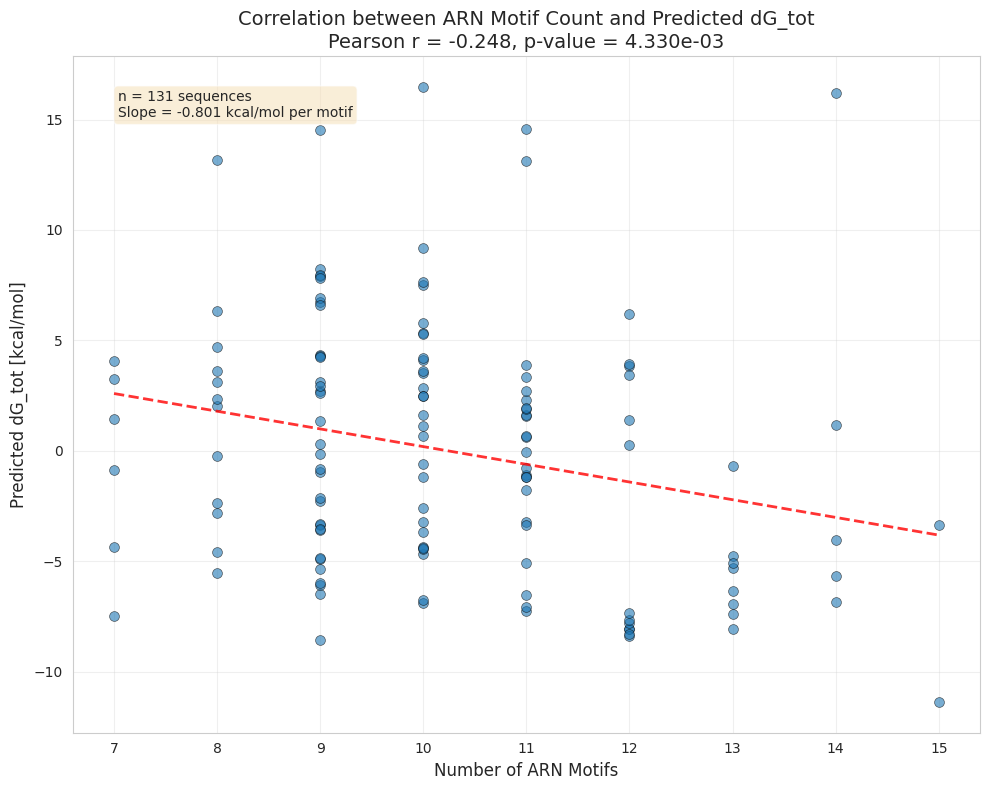

Correlation coefficient (Pearson r): -0.2477
P-value: 4.3301e-03
R-squared: 0.0614

Linear regression equation: dG_tot = -0.801 × (ARN count) + 8.201


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Set up the plot style
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Create scatter plot
plt.scatter(df['ARN_count'], df['Predicted dG_tot [kcal/mol]'], 
            alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

# Calculate correlation
correlation = df['ARN_count'].corr(df['Predicted dG_tot [kcal/mol]'])
pearson_r, p_value = stats.pearsonr(df['ARN_count'], df['Predicted dG_tot [kcal/mol]'])

# Add trend line
z = np.polyfit(df['ARN_count'], df['Predicted dG_tot [kcal/mol]'], 1)
p = np.poly1d(z)
x_trend = np.linspace(df['ARN_count'].min(), df['ARN_count'].max(), 100)
plt.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2, label=f'Linear fit')

# Labels and title
plt.xlabel('Number of ARN Motifs', fontsize=12)
plt.ylabel('Predicted dG_tot [kcal/mol]', fontsize=12)
plt.title('Correlation between ARN Motif Count and Predicted dG_tot\n' + 
          f'Pearson r = {correlation:.3f}, p-value = {p_value:.3e}', fontsize=14)

# Add grid
plt.grid(True, alpha=0.3)

# Add text box with statistics
textstr = f'n = {len(df)} sequences\nSlope = {z[0]:.3f} kcal/mol per motif'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

# Save and show
plt.tight_layout()
plt.savefig(os.path.join(top_dir, 'ARN_motif_vs_dG_correlation.png'), dpi=300, bbox_inches='tight')
plt.show()

# Print additional statistics
print(f"Correlation coefficient (Pearson r): {correlation:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"R-squared: {correlation**2:.4f}")
print(f"\nLinear regression equation: dG_tot = {z[0]:.3f} × (ARN count) + {z[1]:.3f}")

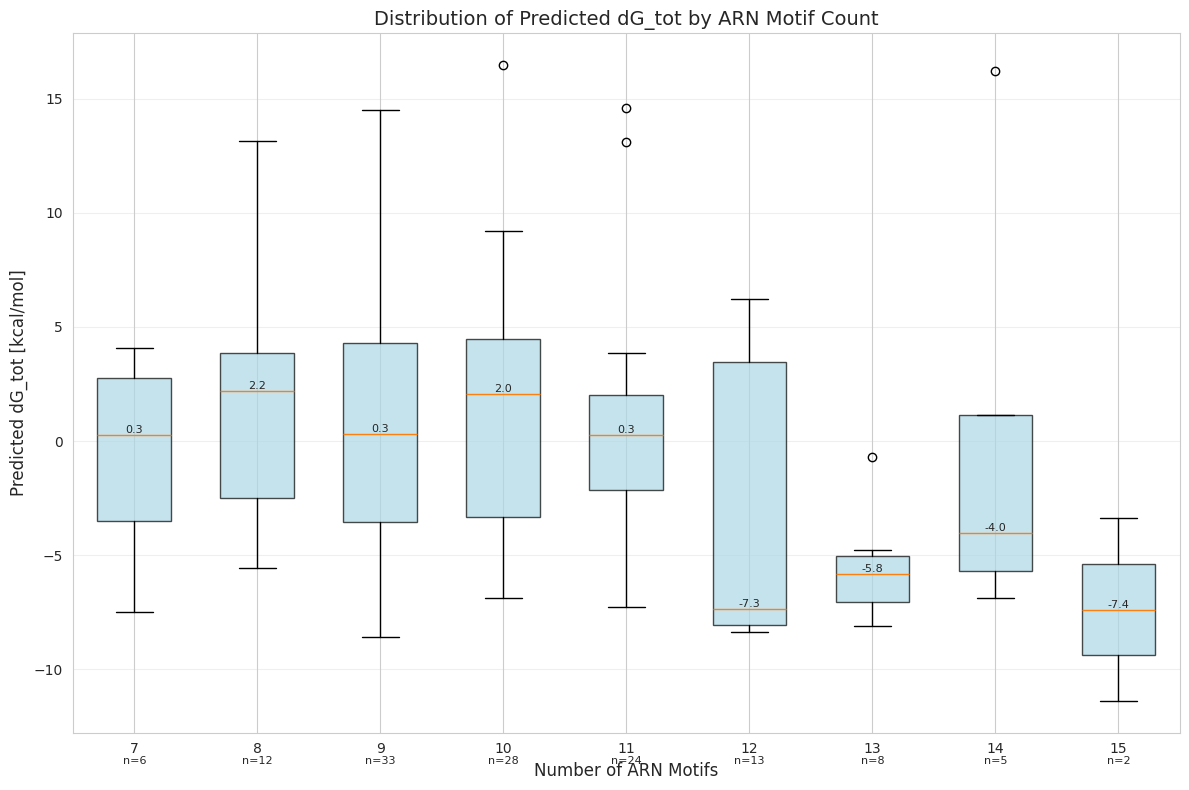


Summary statistics by ARN motif count:
ARN Count | n | Mean dG_tot | Median dG_tot | Std Dev
-------------------------------------------------------
        7 |  6 |       -0.67 |          0.28 |    4.53
        8 | 12 |        1.64 |          2.17 |    5.23
        9 | 33 |        0.91 |          0.32 |    5.56
       10 | 28 |        1.46 |          2.04 |    5.41
       11 | 24 |        0.40 |          0.29 |    5.25
       12 | 13 |       -2.81 |         -7.35 |    5.93
       13 |  8 |       -5.58 |         -5.83 |    2.30
       14 |  5 |        0.16 |         -4.04 |    9.48
       15 |  2 |       -7.38 |         -7.38 |    5.66


In [14]:
# Create a box plot
plt.figure(figsize=(12, 8))

# Create box plot
box_plot = plt.boxplot([df[df['ARN_count'] == count]['Predicted dG_tot [kcal/mol]'].values 
                        for count in sorted(df['ARN_count'].unique())],
                       positions=sorted(df['ARN_count'].unique()),
                       widths=0.6,
                       patch_artist=True,
                       showfliers=True)

# Customize box plot colors
for patch in box_plot['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)

# Add median values as text
for i, count in enumerate(sorted(df['ARN_count'].unique())):
    median_val = df[df['ARN_count'] == count]['Predicted dG_tot [kcal/mol]'].median()
    n_samples = len(df[df['ARN_count'] == count])
    plt.text(count, median_val, f'{median_val:.1f}', 
             horizontalalignment='center', verticalalignment='bottom', fontsize=8)
    # Add sample size below x-axis
    plt.text(count, plt.ylim()[0] - 1, f'n={n_samples}', 
             horizontalalignment='center', verticalalignment='top', fontsize=8)

# Labels and title
plt.xlabel('Number of ARN Motifs', fontsize=12)
plt.ylabel('Predicted dG_tot [kcal/mol]', fontsize=12)
plt.title('Distribution of Predicted dG_tot by ARN Motif Count', fontsize=14)

# Add grid
plt.grid(True, alpha=0.3, axis='y')

# Save and show
plt.tight_layout()
plt.savefig(os.path.join(top_dir, 'ARN_motif_vs_dG_boxplot.png'), dpi=300, bbox_inches='tight')
plt.show()

# Calculate and print summary statistics
print("\nSummary statistics by ARN motif count:")
print("ARN Count | n | Mean dG_tot | Median dG_tot | Std Dev")
print("-" * 55)
for count in sorted(df['ARN_count'].unique()):
    subset = df[df['ARN_count'] == count]['Predicted dG_tot [kcal/mol]']
    print(f"{count:9d} | {len(subset):2d} | {subset.mean():11.2f} | {subset.median():13.2f} | {subset.std():7.2f}")

# ARN motifs vs. fluorescence

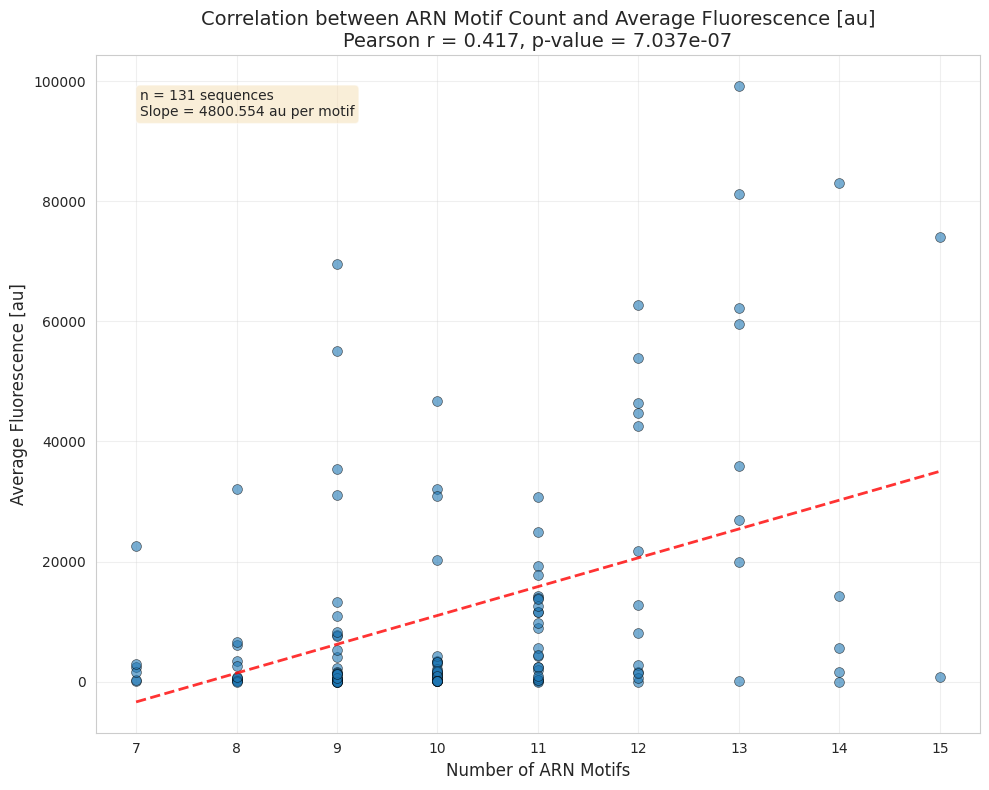

Correlation coefficient (Pearson r): 0.4174
P-value: 7.0373e-07
R-squared: 0.1743

Linear regression equation: Fluorescence = 4800.554 × (ARN count) + -36986.664


In [15]:
# Set up the plot style
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Create scatter plot
plt.scatter(df['ARN_count'], df['Average Fluorescence [au]'], 
            alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

# Calculate correlation
correlation = df['ARN_count'].corr(df['Average Fluorescence [au]'])
pearson_r, p_value = stats.pearsonr(df['ARN_count'], df['Average Fluorescence [au]'])

# Add trend line
z = np.polyfit(df['ARN_count'], df['Average Fluorescence [au]'], 1)
p = np.poly1d(z)
x_trend = np.linspace(df['ARN_count'].min(), df['ARN_count'].max(), 100)
plt.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2, label=f'Linear fit')

# Labels and title
plt.xlabel('Number of ARN Motifs', fontsize=12)
plt.ylabel('Average Fluorescence [au]', fontsize=12)
plt.title('Correlation between ARN Motif Count and Average Fluorescence [au]\n' + 
          f'Pearson r = {correlation:.3f}, p-value = {p_value:.3e}', fontsize=14)

# Add grid
plt.grid(True, alpha=0.3)

# Add text box with statistics
textstr = f'n = {len(df)} sequences\nSlope = {z[0]:.3f} au per motif'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

# Save and show
plt.tight_layout()
plt.savefig(os.path.join(top_dir, 'ARN_motif_vs_fluorescence_correlation.png'), dpi=300, bbox_inches='tight')
plt.show()

# Print additional statistics
print(f"Correlation coefficient (Pearson r): {correlation:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"R-squared: {correlation**2:.4f}")
print(f"\nLinear regression equation: Fluorescence = {z[0]:.3f} × (ARN count) + {z[1]:.3f}")

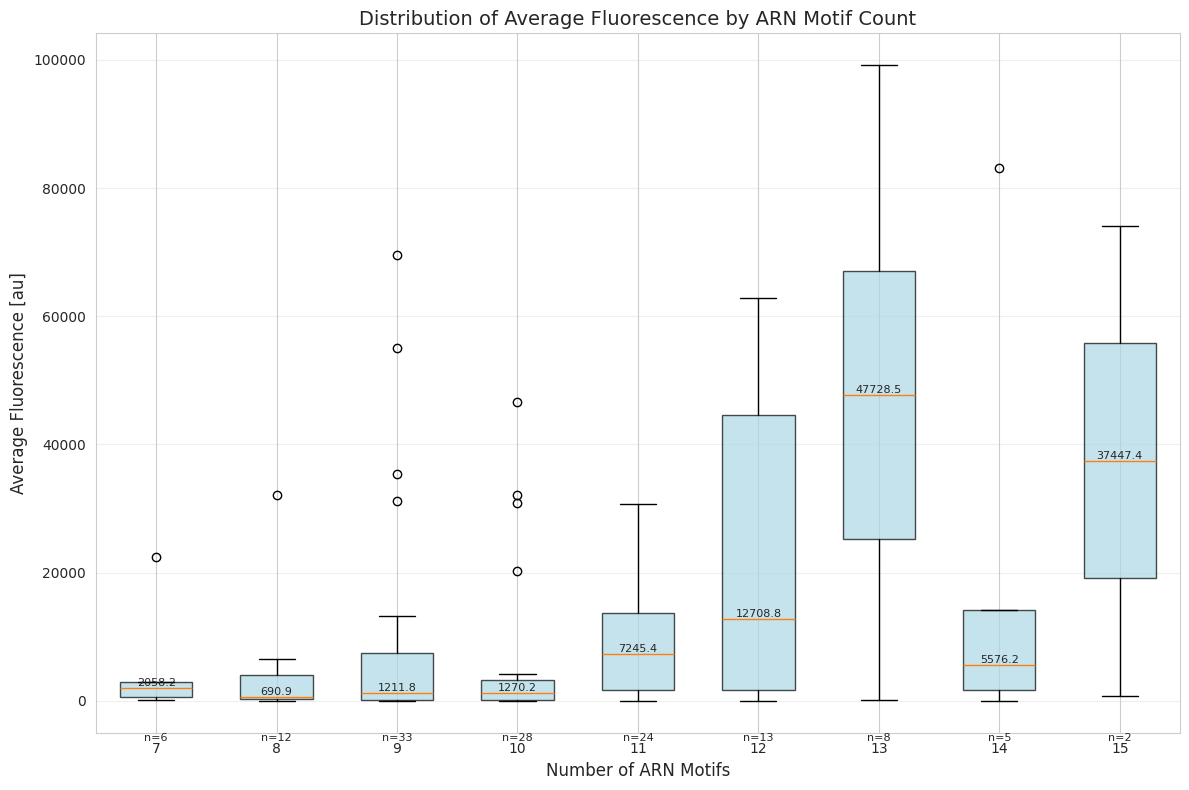


Summary statistics by ARN motif count:
ARN Count | n | Mean Fluorescence | Median Fluorescence | Std Dev
-------------------------------------------------------
        7 |  6 |     5010.22 |       2058.22 | 8656.82
        8 | 12 |     4437.24 |        690.86 | 9009.86
        9 | 33 |     7914.22 |       1211.81 | 16358.10
       10 | 28 |     5761.70 |       1270.16 | 11743.87
       11 | 24 |     8863.66 |       7245.38 | 8445.71
       12 | 13 |    23044.51 |      12708.84 | 23501.90
       13 |  8 |    48133.37 |      47728.52 | 33235.34
       14 |  5 |    20923.15 |       5576.24 | 35186.47
       15 |  2 |    37447.42 |      37447.42 | 51817.81


In [16]:
# Create a box plot
plt.figure(figsize=(12, 8))

# Create box plot
box_plot = plt.boxplot([df[df['ARN_count'] == count]['Average Fluorescence [au]'].values 
                        for count in sorted(df['ARN_count'].unique())],
                       positions=sorted(df['ARN_count'].unique()),
                       widths=0.6,
                       patch_artist=True,
                       showfliers=True)

# Customize box plot colors
for patch in box_plot['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)

# Add median values as text
for i, count in enumerate(sorted(df['ARN_count'].unique())):
    median_val = df[df['ARN_count'] == count]['Average Fluorescence [au]'].median()
    n_samples = len(df[df['ARN_count'] == count])
    plt.text(count, median_val, f'{median_val:.1f}', 
             horizontalalignment='center', verticalalignment='bottom', fontsize=8)
    # Add sample size below x-axis
    plt.text(count, plt.ylim()[0] - 1, f'n={n_samples}', 
             horizontalalignment='center', verticalalignment='top', fontsize=8)

# Labels and title
plt.xlabel('Number of ARN Motifs', fontsize=12)
plt.ylabel('Average Fluorescence [au]', fontsize=12)
plt.title('Distribution of Average Fluorescence by ARN Motif Count', fontsize=14)

# Add grid
plt.grid(True, alpha=0.3, axis='y')

# Save and show
plt.tight_layout()
plt.savefig(os.path.join(top_dir, 'ARN_motif_vs_fluorescence_boxplot.png'), dpi=300, bbox_inches='tight')
plt.show()

# Calculate and print summary statistics
print("\nSummary statistics by ARN motif count:")
print("ARN Count | n | Mean Fluorescence | Median Fluorescence | Std Dev")
print("-" * 55)
for count in sorted(df['ARN_count'].unique()):
    subset = df[df['ARN_count'] == count]['Average Fluorescence [au]']
    print(f"{count:9d} | {len(subset):2d} | {subset.mean():11.2f} | {subset.median():13.2f} | {subset.std():7.2f}")

# Now the same but only for motifs that start with "AA"

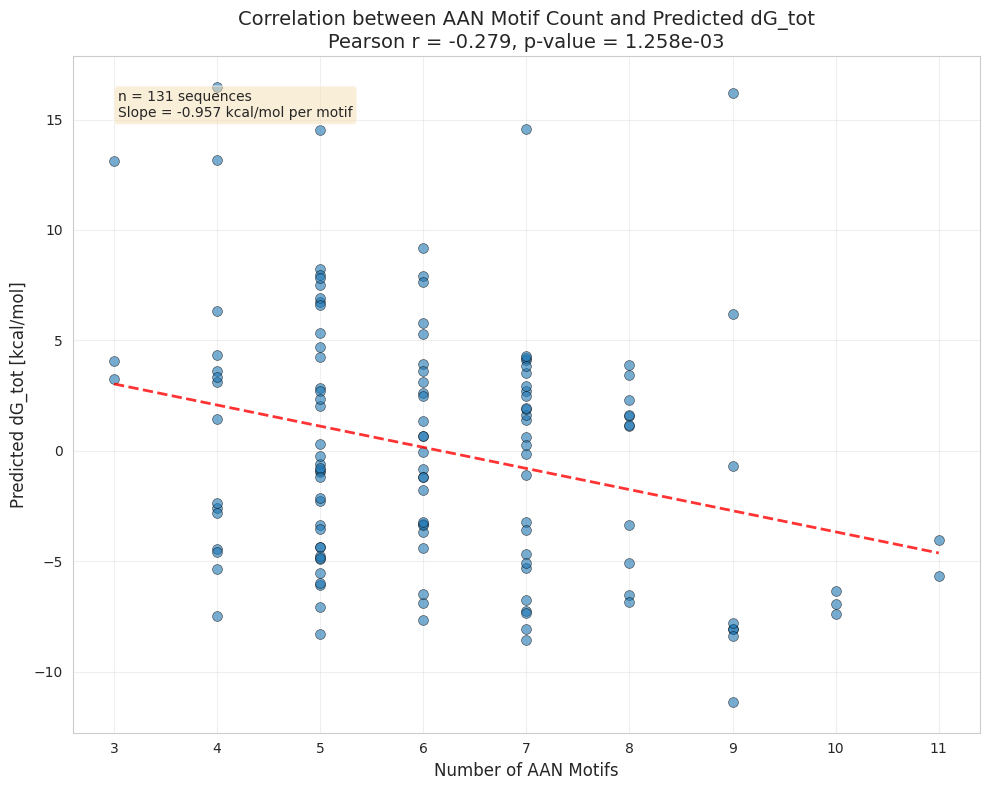

Correlation coefficient (Pearson r): -0.2789
P-value: 1.2577e-03
R-squared: 0.0778

Linear regression equation: dG_tot = -0.957 × (ARN count) + 5.900


In [17]:
# Set up the plot style
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Create scatter plot
plt.scatter(df['AAN_count'], df['Predicted dG_tot [kcal/mol]'], 
            alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

# Calculate correlation
correlation = df['AAN_count'].corr(df['Predicted dG_tot [kcal/mol]'])
pearson_r, p_value = stats.pearsonr(df['AAN_count'], df['Predicted dG_tot [kcal/mol]'])

# Add trend line
z = np.polyfit(df['AAN_count'], df['Predicted dG_tot [kcal/mol]'], 1)
p = np.poly1d(z)
x_trend = np.linspace(df['AAN_count'].min(), df['AAN_count'].max(), 100)
plt.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2, label=f'Linear fit')

# Labels and title
plt.xlabel('Number of AAN Motifs', fontsize=12)
plt.ylabel('Predicted dG_tot [kcal/mol]', fontsize=12)
plt.title('Correlation between AAN Motif Count and Predicted dG_tot\n' + 
          f'Pearson r = {correlation:.3f}, p-value = {p_value:.3e}', fontsize=14)

# Add grid
plt.grid(True, alpha=0.3)

# Add text box with statistics
textstr = f'n = {len(df)} sequences\nSlope = {z[0]:.3f} kcal/mol per motif'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

# Save and show
plt.tight_layout()
plt.savefig(os.path.join(top_dir, 'AAN_motif_vs_dG_correlation.png'), dpi=300, bbox_inches='tight')
plt.show()

# Print additional statistics
print(f"Correlation coefficient (Pearson r): {correlation:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"R-squared: {correlation**2:.4f}")
print(f"\nLinear regression equation: dG_tot = {z[0]:.3f} × (ARN count) + {z[1]:.3f}")

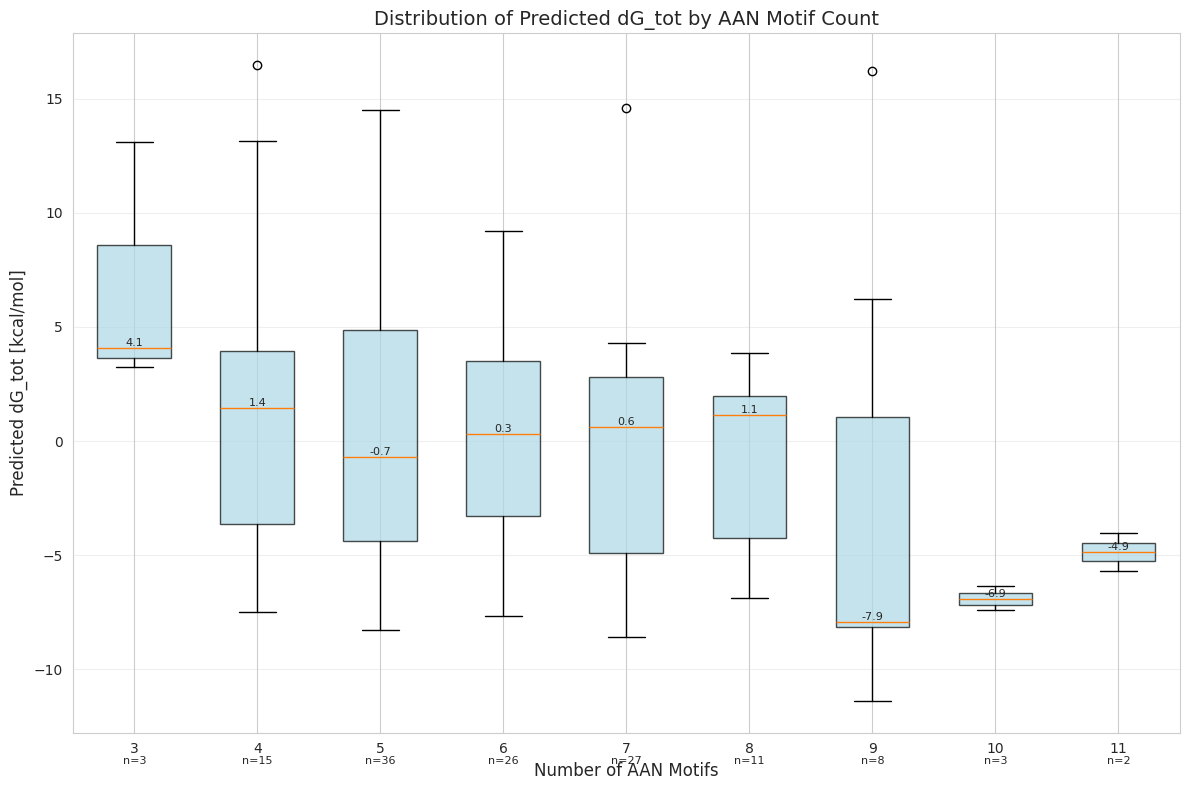


Summary statistics by AAN motif count:
AAN Count | n | Mean dG_tot | Median dG_tot | Std Dev
-------------------------------------------------------
        3 |  3 |        6.80 |          4.08 |    5.47
        4 | 15 |        1.47 |          1.43 |    6.83
        5 | 36 |        0.51 |         -0.68 |    5.48
        6 | 26 |        0.39 |          0.30 |    4.64
        7 | 27 |       -0.40 |          0.63 |    5.25
        8 | 11 |       -0.62 |          1.15 |    4.04
        9 |  8 |       -2.74 |         -7.93 |    9.51
       10 |  3 |       -6.89 |         -6.92 |    0.53
       11 |  2 |       -4.86 |         -4.86 |    1.15


In [18]:
# Create a box plot
plt.figure(figsize=(12, 8))

# Create box plot
box_plot = plt.boxplot([df[df['AAN_count'] == count]['Predicted dG_tot [kcal/mol]'].values 
                        for count in sorted(df['AAN_count'].unique())],
                       positions=sorted(df['AAN_count'].unique()),
                       widths=0.6,
                       patch_artist=True,
                       showfliers=True)

# Customize box plot colors
for patch in box_plot['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)

# Add median values as text
for i, count in enumerate(sorted(df['AAN_count'].unique())):
    median_val = df[df['AAN_count'] == count]['Predicted dG_tot [kcal/mol]'].median()
    n_samples = len(df[df['AAN_count'] == count])
    plt.text(count, median_val, f'{median_val:.1f}', 
             horizontalalignment='center', verticalalignment='bottom', fontsize=8)
    # Add sample size below x-axis
    plt.text(count, plt.ylim()[0] - 1, f'n={n_samples}', 
             horizontalalignment='center', verticalalignment='top', fontsize=8)

# Labels and title
plt.xlabel('Number of AAN Motifs', fontsize=12)
plt.ylabel('Predicted dG_tot [kcal/mol]', fontsize=12)
plt.title('Distribution of Predicted dG_tot by AAN Motif Count', fontsize=14)

# Add grid
plt.grid(True, alpha=0.3, axis='y')

# Save and show
plt.tight_layout()
plt.savefig(os.path.join(top_dir, 'AAN_motif_vs_dG_boxplot.png'), dpi=300, bbox_inches='tight')
plt.show()

# Calculate and print summary statistics
print("\nSummary statistics by AAN motif count:")
print("AAN Count | n | Mean dG_tot | Median dG_tot | Std Dev")
print("-" * 55)
for count in sorted(df['AAN_count'].unique()):
    subset = df[df['AAN_count'] == count]['Predicted dG_tot [kcal/mol]']
    print(f"{count:9d} | {len(subset):2d} | {subset.mean():11.2f} | {subset.median():13.2f} | {subset.std():7.2f}")